In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [158]:
pd.set_option('display.max_columns', None) 
pd.set_option('float_format', '{:.2f}'.format)

In [159]:
df = pd.read_csv('data/merged_data.csv',low_memory=False)

In [160]:
df.head()

,CITY,Cust Type,Customer No.,District,Invoice Date,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Regn No,Technician Name,Total Value,year,month,Service_Time_Hrs,Partner Type,Data Origin,Title,Name 1,House number and street,Postal Code,City,Sales organization,State,DBM Order,Description,Item Category,Order Quantity,Net value
0,nashik,Retail,54971,Maharashtra,2016-08-19,7169800818,436123,123,699.05,MARUTI SUZUKI,660.06,CELERIO,0.00,Paid Service,85.36,400002,X099,MH15EX7889,X099SA1,1444.47,2016,8,29.59,Retail,Ref-Customer,Male,X099 - AUTO WORLD CAR CARE,"Plot # 9, Pethe Nagar Road,",422009,Nashik,MFCD,Maharashtra,436123,"BALANCE WEIGHT 15GRAM, Paid Service-Minor, MIS...","P011, P001, P002",9.00,1444.47
1,nashik,Retail,54493,Maharashtra,2016-09-10,7169801078,456143,64496,1048.94,MAHINDRA & MAHINDRA,798.95,VERITO,0.00,Paid Service,3107.44,400002,X099,MH15DC8279,X099SA1,4955.33,2016,9,1.14,Retail,Ref-Customer,Male,X099 - AUTO WORLD CAR CARE,"Plot # 9, Pethe Nagar Road,",422009,Nashik,MFCD,Maharashtra,456143,"Brake Overhaul (Front)-Partial, Paid Service-M...","P011, P001, P002",10.00,4955.33
2,nashik,Retail,73552,Maharashtra,2016-07-09,7169800547,405557,64932,599.04,HYUNDAI,0.00,I10,0.00,Paid Service,1144.10,400002,X099,MH15CT1059,X099SA1,1743.14,2016,7,21.60,Retail,Ref-Customer,Male,X099 - AUTO WORLD CAR CARE,"Plot # 9, Pethe Nagar Road,",422009,Nashik,MFCD,Maharashtra,405557,"Paid Service-Minor, OIL FILTER, Air Filter-Pla...","P001, P002",6.00,1743.14
3,nashik,Retail,E16200,Maharashtra,2016-08-03,7169800756,424352,58000,99.14,TOYOTA,0.00,COROLLA,0.00,Running Repairs,0.00,422200,X099,MH15BX3453,X099WM1,99.14,2016,8,96.01,Retail,Camp-Outdoor,Male,X099 - AUTO WORLD CAR CARE,"Plot # 9, Pethe Nagar Road,",422009,Nashik,MFCD,Maharashtra,424352,MISC LABOR 0.25 HOURS,P001,15.00,99.14
4,nashik,Retail,90858,Maharashtra,2016-07-21,7169800602,400292,114771,3692.98,HYUNDAI,0.00,SANTRO,0.00,Paid Service,6627.59,422007,X099,MH15BX0779,X099SA1,10320.57,2016,7,505.62,Retail,Ref-Customer,Male,X099 - AUTO WORLD CAR CARE,"Plot # 9, Pethe Nagar Road,",422009,Nashik,MFCD,Maharashtra,400292,"AIR FILTER, BRAKE OIL DOT 4, Paid Service-Mino...","P001, P002",293.37,10320.57


In [161]:
df.shape

(196011, 37)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196011 entries, 0 to 196010
Data columns (total 37 columns):
CITY                       196011 non-null object
Cust Type                  196011 non-null object
Customer No.               196011 non-null object
District                   196011 non-null object
Invoice Date               196011 non-null object
Invoice No                 196011 non-null int64
Job Card No                196011 non-null int64
KMs Reading                196011 non-null int64
Labour Total               196011 non-null float64
Make                       196011 non-null object
Misc Total                 196011 non-null float64
Model                      196011 non-null object
OSL Total                  196011 non-null float64
Order Type                 196011 non-null object
Parts Total                196011 non-null float64
Pin code                   196011 non-null int64
Plant                      196011 non-null object
Regn No                    196011 non-n

In [163]:
df.isnull().sum()* 100 / len(df)

CITY                      0.00
Cust Type                 0.00
Customer No.              0.00
District                  0.00
Invoice Date              0.00
Invoice No                0.00
Job Card No               0.00
KMs Reading               0.00
Labour Total              0.00
Make                      0.00
Misc Total                0.00
Model                     0.00
OSL Total                 0.00
Order Type                0.00
Parts Total               0.00
Pin code                  0.00
Plant                     0.00
Regn No                   0.00
Technician Name           0.00
Total Value               0.00
year                      0.00
month                     0.00
Service_Time_Hrs          0.00
Partner Type              0.00
Data Origin               0.00
Title                     0.00
Name 1                    0.00
House number and street   0.00
Postal Code               0.00
City                      0.00
Sales organization        0.00
State                     0.00
DBM Orde

In [164]:
df['year'].unique()

array([2016, 2014, 2015, 2013, 2012], dtype=int64)

In [165]:
clusters_customer = df.groupby(['Customer No.','Partner Type','Make','Model','CITY','District','Order Type']).agg(
                                {
                                 'Invoice No':'nunique',
                                 'Net value':'sum',
                                 'Service_Time_Hrs':'mean'
                                })

In [166]:
clusters_customer.shape

(153385, 3)

In [167]:
clusters_customer.head()

Invoice No  \
Customer No. Partner Type Make                 Model  CITY     District    Order Type                    
100001       Retail       MAHINDRA &  MAHINDRA BOLERO talegaon Maharashtra Running Repairs           1   
                          SKODA                SUPERB talegaon Maharashtra Running Repairs           1   
                          TOYOTA               INNOVA talegaon Maharashtra Accidental                1   
100004       Retail       HYUNDAI              I20    pune     Maharashtra Running Repairs           1   
100006       Retail       MARUTI SUZUKI        800    abohar   Punjab      Paid Service              1   

                                                                                            Net value  \
Customer No. Partner Type Make                 Model  CITY     District    Order Type                   
100001       Retail       MAHINDRA &  MAHINDRA BOLERO talegaon Maharashtra Running Repairs     697.59   
                          SKODA                SUPERB talegaon Maharashtra Running Repairs    1058.44   
                          TOYOTA               INNOVA talegaon Maharashtra Accidental         2507.72   
100004       Retail       HYUNDAI              I20    pune     Maharashtra Running Repairs     249.22   
100006       Retail       MARUTI SUZUKI        800    abohar   Punjab      Paid Service       1223.71   

                                                                                            Service_Time_Hrs  
Customer No. Partner Type Make                 Model  CITY     District    Order Type                         
100001       Retail       MAHINDRA &  MAHINDRA BOLERO talegaon Maharashtra Running Repairs              0.79  
                          SKODA                SUPERB talegaon Maharashtra Running Repairs             47.43  
                          TOYOTA               INNOVA talegaon Maharashtra Accidental                 233.54  
100004       Retail       HYUNDAI              I20    pune     Maharashtra Running Repairs              1.73  
100006       Retail       MARUTI SUZUKI        800    abohar   Punjab      Paid Service                48.18

In [168]:
clusters_customer.columns

Index(['Invoice No', 'Net value', 'Service_Time_Hrs'], dtype='object')

In [169]:
clusters_customer.columns =['Total Invoices','Total Revenue','Total Servicing Hrs']

In [170]:
clusters_customer = clusters_customer.reset_index()

In [171]:
clusters_customer.head()

,Customer No.,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs
0,100001,Retail,MAHINDRA & MAHINDRA,BOLERO,talegaon,Maharashtra,Running Repairs,1,697.59,0.79
1,100001,Retail,SKODA,SUPERB,talegaon,Maharashtra,Running Repairs,1,1058.44,47.43
2,100001,Retail,TOYOTA,INNOVA,talegaon,Maharashtra,Accidental,1,2507.72,233.54
3,100004,Retail,HYUNDAI,I20,pune,Maharashtra,Running Repairs,1,249.22,1.73
4,100006,Retail,MARUTI SUZUKI,800,abohar,Punjab,Paid Service,1,1223.71,48.18


In [172]:
# Calculating frequency of visits & total revenue of a customer for calculation of ltv

customer_freq=clusters_customer.reset_index()
customer_freq.head()
ltv_make_model_r=customer_freq.copy()
ltv_make_model_r["LTV"] = ltv_make_model_r["Total Invoices"] * ltv_make_model_r["Total Revenue"]
ltv_make_model_r.head()

,index,Customer No.,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs,LTV
0,0,100001,Retail,MAHINDRA & MAHINDRA,BOLERO,talegaon,Maharashtra,Running Repairs,1,697.59,0.79,697.59
1,1,100001,Retail,SKODA,SUPERB,talegaon,Maharashtra,Running Repairs,1,1058.44,47.43,1058.44
2,2,100001,Retail,TOYOTA,INNOVA,talegaon,Maharashtra,Accidental,1,2507.72,233.54,2507.72
3,3,100004,Retail,HYUNDAI,I20,pune,Maharashtra,Running Repairs,1,249.22,1.73,249.22
4,4,100006,Retail,MARUTI SUZUKI,800,abohar,Punjab,Paid Service,1,1223.71,48.18,1223.71


In [173]:
#ltv_make_model_r = ltv_make_model_r[ltv_make_model_r['LTV'] > 0]

In [174]:
ltv_make_model_r

,index,Customer No.,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs,LTV
0,0,100001,Retail,MAHINDRA & MAHINDRA,BOLERO,talegaon,Maharashtra,Running Repairs,1,697.59,0.79,697.59
1,1,100001,Retail,SKODA,SUPERB,talegaon,Maharashtra,Running Repairs,1,1058.44,47.43,1058.44
2,2,100001,Retail,TOYOTA,INNOVA,talegaon,Maharashtra,Accidental,1,2507.72,233.54,2507.72
3,3,100004,Retail,HYUNDAI,I20,pune,Maharashtra,Running Repairs,1,249.22,1.73,249.22
4,4,100006,Retail,MARUTI SUZUKI,800,abohar,Punjab,Paid Service,1,1223.71,48.18,1223.71
...,...,...,...,...,...,...,...,...,...,...,...,...
153380,153380,E5254,Retail,MAHINDRA & MAHINDRA,LOGAN P,chennai,Tamil Nadu,Running Repairs,1,16343.24,144.30,16343.24
153381,153381,E6709,Retail,HYUNDAI,SANTRO,chennai,Tamil Nadu,SMC Redemption,1,0.00,147.74,0.00
153382,153382,E6951,Retail,FORD,IKON,chennai,Tamil Nadu,Mechanical,1,4448.89,8.10,4448.89
153383,153383,E6951,Retail,FORD,IKON,chennai,Tamil Nadu,Running Repairs,3,29783.09,213.51,89349.27


In [175]:
ltv_with_zero = ltv_make_model_r

In [176]:
print("0.05 quantile :-",ltv_make_model_r['LTV'].quantile(0.05))
print("0.25 quantile :-",ltv_make_model_r['LTV'].quantile(0.25))
print("0.50 quantile :-",ltv_make_model_r['LTV'].quantile(0.50))
print("0.75 quantile :-",ltv_make_model_r['LTV'].quantile(0.75))
print("0.95 quantile :-",ltv_make_model_r['LTV'].quantile(0.95))
print("minimum LTV :-",ltv_make_model_r['LTV'].min())
print("maximum LTV :-",ltv_make_model_r['LTV'].max())
print("mean LTV :-",ltv_make_model_r['LTV'].mean())

0.05 quantile :- 0.85
0.25 quantile :- 399.14
0.50 quantile :- 2104.32
0.75 quantile :- 6288.23
0.95 quantile :- 34234.63199999994
minimum LTV :- -0.01
maximum LTV :- 14246060.63999999
mean LTV :- 9103.198512175739


In [177]:
# Low revenue customers (less than 0.50 quantile)

zero_ltv= ltv_make_model_r[ltv_make_model_r['LTV'] == 0]

low_ltv= ltv_make_model_r[(ltv_make_model_r['LTV']< ltv_make_model_r['LTV'].quantile(0.50)) & (ltv_make_model_r['LTV']>0)]

# Medium revenue customers (between 0.50 to 0.75 quantile)
medium_ltv = ltv_make_model_r[
                            (ltv_make_model_r['LTV'] >= ltv_make_model_r['LTV'].quantile(0.50)) & 
                            (ltv_make_model_r['LTV']< ltv_make_model_r['LTV'].quantile(0.75))
                         ]

# Average revenue customers (more than 0.75)
high_ltv = ltv_make_model_r[
                        (ltv_make_model_r['LTV'] >= ltv_make_model_r['LTV'].quantile(0.75)) 
                      ]



In [178]:
print(zero_ltv.shape)
print(low_ltv.shape)
print(medium_ltv.shape)
print(high_ltv.shape)

(5764, 12)
(70924, 12)
(38346, 12)
(38347, 12)


In [179]:
zero_ltv['ltv_label'] = 'zero'
low_ltv['ltv_label'] = 'low'
medium_ltv['ltv_label'] = 'medium'
high_ltv['ltv_label'] = 'high'

In [180]:
ltv_df = pd.concat([zero_ltv,low_ltv,medium_ltv,high_ltv],axis=0)

In [181]:
ltv_df.head()

,index,Customer No.,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs,LTV,ltv_label
56,56,100091,Retail,GENERAL MOTORS,SPARK,kharar,Punjab,Mechanical,1,0.00,2.97,0.00,zero
58,58,100091,Retail,GENERAL MOTORS,SPARK,kharar,Punjab,SMC Redemption,1,0.00,1.03,0.00,zero
60,60,100092,Retail,MARUTI SUZUKI,WAGONR,meerut,Uttar Pradesh,Running Repairs,1,0.00,6.22,0.00,zero
62,62,100094,Retail,HYUNDAI,SANTRO,meerut,Uttar Pradesh,Running Repairs,1,0.00,194.49,0.00,zero
81,81,100146,Retail,TOYOTA,QUALIS,meerut,Uttar Pradesh,Running Repairs,2,0.00,12.65,0.00,zero


In [182]:
ltv_df.isnull().sum()

index                  0
Customer No.           0
Partner Type           0
Make                   0
Model                  0
CITY                   0
District               0
Order Type             0
Total Invoices         0
Total Revenue          0
Total Servicing Hrs    0
LTV                    0
ltv_label              0
dtype: int64

In [183]:
ltv_df["ltv_label"].value_counts(dropna=False)

low       70924
high      38347
medium    38346
zero       5764
Name: ltv_label, dtype: int64

In [184]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split as tts,cross_val_score,ShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score

In [185]:
le=LabelEncoder()
ltv_df["Make"]=le.fit_transform(ltv_df["Make"])
ltv_df["Model"]=le.fit_transform(ltv_df["Model"])
ltv_df["Partner Type"]=le.fit_transform(ltv_df["Partner Type"])
ltv_df["CITY"]=le.fit_transform(ltv_df["CITY"])
ltv_df["District"]=le.fit_transform(ltv_df["District"])
ltv_df["Order Type"]=le.fit_transform(ltv_df["Order Type"])
ltv_df["ltv_label"]=le.fit_transform(ltv_df["ltv_label"])
ltv_df.head()

,index,Customer No.,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs,LTV,ltv_label
56,56,100091,4,6,185,4303,27,1,1,0.00,2.97,0.00,3
58,58,100091,4,6,185,4303,27,5,1,0.00,1.03,0.00,3
60,60,100092,4,13,221,5438,33,4,1,0.00,6.22,0.00,3
62,62,100094,4,9,174,5438,33,4,1,0.00,194.49,0.00,3
81,81,100146,4,25,158,5438,33,4,2,0.00,12.65,0.00,3


In [186]:
ltv_df.drop(['index','Customer No.'],axis=1,inplace=True)

In [187]:
ltv_df.head()

,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs,LTV,ltv_label
56,4,6,185,4303,27,1,1,0.00,2.97,0.00,3
58,4,6,185,4303,27,5,1,0.00,1.03,0.00,3
60,4,13,221,5438,33,4,1,0.00,6.22,0.00,3
62,4,9,174,5438,33,4,1,0.00,194.49,0.00,3
81,4,25,158,5438,33,4,2,0.00,12.65,0.00,3


In [188]:
from sklearn.cluster import KMeans

In [189]:
dist=[]
# Iterate from 1-9
for i in range(1, 10):
    # Initialize KMeans algorithm
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    # Fit on data
    km.fit(ltv_df)
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)

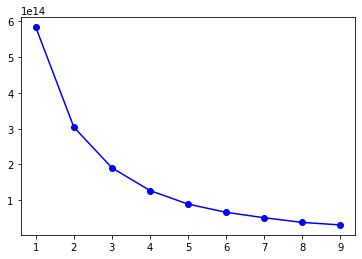

In [190]:
# Line plot # clusters on X-axis and WCSS on Y-axis 
plt.plot(range(1, 10), dist, 'bo-')
plt.show()

In [191]:
# Calculating frequency of visits & total revenue of a customer for calculation of ltv

customer_freq=clusters_customer.reset_index()
customer_freq.head()
ltv_make_model_r=customer_freq.copy()
ltv_make_model_r["LTV"] = ltv_make_model_r["Total Invoices"] * ltv_make_model_r["Total Revenue"]
ltv_make_model_r.head()

,index,Customer No.,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs,LTV
0,0,100001,Retail,MAHINDRA & MAHINDRA,BOLERO,talegaon,Maharashtra,Running Repairs,1,697.59,0.79,697.59
1,1,100001,Retail,SKODA,SUPERB,talegaon,Maharashtra,Running Repairs,1,1058.44,47.43,1058.44
2,2,100001,Retail,TOYOTA,INNOVA,talegaon,Maharashtra,Accidental,1,2507.72,233.54,2507.72
3,3,100004,Retail,HYUNDAI,I20,pune,Maharashtra,Running Repairs,1,249.22,1.73,249.22
4,4,100006,Retail,MARUTI SUZUKI,800,abohar,Punjab,Paid Service,1,1223.71,48.18,1223.71


In [192]:
ltv_make_model_r = ltv_make_model_r[ltv_make_model_r['LTV'] > 0]

In [193]:
ltv_make_model_r.drop(['index','Customer No.'],axis=1,inplace=True)

In [194]:
ltv_make_model_r.head()

,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs,LTV
0,Retail,MAHINDRA & MAHINDRA,BOLERO,talegaon,Maharashtra,Running Repairs,1,697.59,0.79,697.59
1,Retail,SKODA,SUPERB,talegaon,Maharashtra,Running Repairs,1,1058.44,47.43,1058.44
2,Retail,TOYOTA,INNOVA,talegaon,Maharashtra,Accidental,1,2507.72,233.54,2507.72
3,Retail,HYUNDAI,I20,pune,Maharashtra,Running Repairs,1,249.22,1.73,249.22
4,Retail,MARUTI SUZUKI,800,abohar,Punjab,Paid Service,1,1223.71,48.18,1223.71


In [195]:
#ltv_make_model_r.to_csv('data/ltv.csv',index=False)

In [196]:
# Low revenue customers (less than 0.50 quantile)
low_ltv= ltv_make_model_r[(ltv_make_model_r['LTV']< ltv_make_model_r['LTV'].quantile(0.50)) & (ltv_make_model_r['LTV']>0)]

# Medium revenue customers (between 0.50 to 0.75 quantile)
medium_ltv = ltv_make_model_r[
                            (ltv_make_model_r['LTV'] >= ltv_make_model_r['LTV'].quantile(0.50)) & 
                            (ltv_make_model_r['LTV']< ltv_make_model_r['LTV'].quantile(0.75))
                         ]

# Average revenue customers (more than 0.75)
high_ltv = ltv_make_model_r[
                        (ltv_make_model_r['LTV'] >= ltv_make_model_r['LTV'].quantile(0.75)) 
                      ]



In [197]:
low_ltv['ltv_label'] = 'low'
medium_ltv['ltv_label'] = 'medium'
high_ltv['ltv_label'] = 'high'

In [198]:
ltv_df = pd.concat([low_ltv,medium_ltv,high_ltv],axis=0)

In [199]:
le=LabelEncoder()
ltv_df["Make"]=le.fit_transform(ltv_df["Make"])
ltv_df["Model"]=le.fit_transform(ltv_df["Model"])
ltv_df["Partner Type"]=le.fit_transform(ltv_df["Partner Type"])
ltv_df["CITY"]=le.fit_transform(ltv_df["CITY"])
ltv_df["District"]=le.fit_transform(ltv_df["District"])
ltv_df["Order Type"]=le.fit_transform(ltv_df["Order Type"])
ltv_df["ltv_label"]=le.fit_transform(ltv_df["ltv_label"])
ltv_df.head()

,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs,LTV,ltv_label
0,4,12,32,8647,20,3,1,697.59,0.79,697.59,1
1,4,22,190,8647,20,3,1,1058.44,47.43,1058.44,1
3,4,9,95,7238,20,3,1,249.22,1.73,249.22,1
4,4,13,6,246,27,2,1,1223.71,48.18,1223.71,1
6,4,13,219,10253,12,3,1,488.18,1.43,488.18,1


In [200]:
dist=[]
# Iterate from 1-9
for i in range(1, 10):
    # Initialize KMeans algorithm
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    # Fit on data
    km.fit(ltv_df)
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)

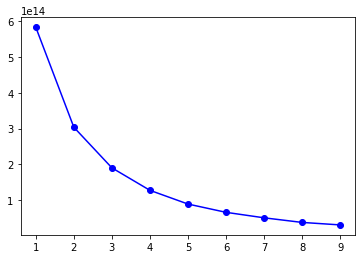

In [201]:
# Line plot # clusters on X-axis and WCSS on Y-axis 
plt.plot(range(1, 10), dist, 'bo-')
plt.show()

In [202]:
# Calculating frequency of visits & total revenue of a customer for calculation of ltv

customer_freq=clusters_customer.reset_index()
customer_freq.head()
ltv_make_model_r=customer_freq.copy()
ltv_make_model_r["LTV"] = ltv_make_model_r["Total Invoices"] * ltv_make_model_r["Total Revenue"]
ltv_make_model_r.head()

,index,Customer No.,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs,LTV
0,0,100001,Retail,MAHINDRA & MAHINDRA,BOLERO,talegaon,Maharashtra,Running Repairs,1,697.59,0.79,697.59
1,1,100001,Retail,SKODA,SUPERB,talegaon,Maharashtra,Running Repairs,1,1058.44,47.43,1058.44
2,2,100001,Retail,TOYOTA,INNOVA,talegaon,Maharashtra,Accidental,1,2507.72,233.54,2507.72
3,3,100004,Retail,HYUNDAI,I20,pune,Maharashtra,Running Repairs,1,249.22,1.73,249.22
4,4,100006,Retail,MARUTI SUZUKI,800,abohar,Punjab,Paid Service,1,1223.71,48.18,1223.71


In [203]:
ltv_make_model_r = ltv_make_model_r[ltv_make_model_r['LTV'] > 0]

In [204]:
ltv_make_model_r.drop(['index','Customer No.','Total Servicing Hrs'],axis=1,inplace=True)

In [205]:
ltv_make_model_r.head()

,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,LTV
0,Retail,MAHINDRA & MAHINDRA,BOLERO,talegaon,Maharashtra,Running Repairs,1,697.59,697.59
1,Retail,SKODA,SUPERB,talegaon,Maharashtra,Running Repairs,1,1058.44,1058.44
2,Retail,TOYOTA,INNOVA,talegaon,Maharashtra,Accidental,1,2507.72,2507.72
3,Retail,HYUNDAI,I20,pune,Maharashtra,Running Repairs,1,249.22,249.22
4,Retail,MARUTI SUZUKI,800,abohar,Punjab,Paid Service,1,1223.71,1223.71


In [206]:
ltv_make_model_r.shape

(147617, 9)

In [207]:
# Low revenue customers (less than 0.50 quantile)
low_ltv= ltv_make_model_r[(ltv_make_model_r['LTV']< ltv_make_model_r['LTV'].quantile(0.50))]

# Medium revenue customers (between 0.50 to 0.75 quantile)
medium_ltv = ltv_make_model_r[
                            (ltv_make_model_r['LTV'] >= ltv_make_model_r['LTV'].quantile(0.50)) & 
                            (ltv_make_model_r['LTV']< ltv_make_model_r['LTV'].quantile(0.75))
                         ]

# Average revenue customers (more than 0.75)
high_ltv = ltv_make_model_r[
                        (ltv_make_model_r['LTV'] >= ltv_make_model_r['LTV'].quantile(0.75)) 
                      ]



In [208]:
low_ltv['ltv_label'] = 'low'
medium_ltv['ltv_label'] = 'medium'
high_ltv['ltv_label'] = 'high'

In [209]:
ltv_df = pd.concat([low_ltv,medium_ltv,high_ltv],axis=0)

In [210]:
final_ltv = ltv_df

In [211]:
ltv_df.head()

,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,LTV,ltv_label
0,Retail,MAHINDRA & MAHINDRA,BOLERO,talegaon,Maharashtra,Running Repairs,1,697.59,697.59,low
1,Retail,SKODA,SUPERB,talegaon,Maharashtra,Running Repairs,1,1058.44,1058.44,low
3,Retail,HYUNDAI,I20,pune,Maharashtra,Running Repairs,1,249.22,249.22,low
4,Retail,MARUTI SUZUKI,800,abohar,Punjab,Paid Service,1,1223.71,1223.71,low
6,Retail,MARUTI SUZUKI,WAGONR,yamunanagar,Haryana,Running Repairs,1,488.18,488.18,low


In [212]:
ltv_df=pd.get_dummies(data=ltv_df, columns=["Make", "District", "Order Type","Partner Type"])

In [213]:
ltv_df.head()

,Model,CITY,Total Invoices,Total Revenue,LTV,ltv_label,Make_AUDI,Make_BMW,Make_DAEWOO,Make_FIAT,Make_FORCE,Make_FORD,Make_GENERAL MOTORS,Make_HINDUSTAN MOTORS,Make_HONDA,Make_HYUNDAI,Make_JEEP,Make_LAND ROVER,Make_MAHINDRA & MAHINDRA,Make_MARUTI SUZUKI,Make_MERCEDES BENZ,Make_MITSUBISHI MOTORS,Make_MORRIS,Make_NISSAN,Make_PORCHE,Make_PREMIER AUTOMOBILES,Make_RENAULT,Make_SAN MOTORS,Make_SKODA,Make_SONALIKA,Make_TATA MOTORS,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,District_Andaman and Nico.In.,District_Andhra Pradesh,District_Arunachal Pradesh,District_Assam,District_Bihar,District_Chandigarh,District_Chhattisgarh,District_Dadra and Nagar Hav.,District_Daman and Diu,District_Delhi,District_Goa,District_Gujarat,District_Haryana,District_Himachal Pradesh,District_Jammu and Kashmir,District_Jharkhand,District_Karnataka,District_Kerala,District_Lakshadweep,District_Madhya Pradesh,District_Maharashtra,District_Manipur,District_Megalaya,District_Mizoram,District_Nagaland,District_Odisha,District_Puducherry,District_Punjab,District_Rajasthan,District_Sikkim,District_Tamil Nadu,District_Telangana,District_Tripura,District_Uttar Pradesh,District_Uttarakhand,District_West Bengal,Order Type_Accidental,Order Type_Mechanical,Order Type_Paid Service,Order Type_Running Repairs,Order Type_SMC Redemption,Order Type_SMC Value Package,Order Type_WBW Order,Partner Type_Contact Person,Partner Type_Employee,Partner Type_Fleet,Partner Type_Insurance Company,Partner Type_Retail
0,BOLERO,talegaon,1,697.59,697.59,low,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,SUPERB,talegaon,1,1058.44,1058.44,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,I20,pune,1,249.22,249.22,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,800,abohar,1,1223.71,1223.71,low,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6,WAGONR,yamunanagar,1,488.18,488.18,low,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [214]:
le=LabelEncoder()
ltv_df["Model"]=le.fit_transform(ltv_df["Model"])
ltv_df["CITY"]=le.fit_transform(ltv_df["CITY"])
#ltv_df["ltv_label"]=le.fit_transform(ltv_df["ltv_label"])

In [215]:
ltv_df.head()

,Model,CITY,Total Invoices,Total Revenue,LTV,ltv_label,Make_AUDI,Make_BMW,Make_DAEWOO,Make_FIAT,Make_FORCE,Make_FORD,Make_GENERAL MOTORS,Make_HINDUSTAN MOTORS,Make_HONDA,Make_HYUNDAI,Make_JEEP,Make_LAND ROVER,Make_MAHINDRA & MAHINDRA,Make_MARUTI SUZUKI,Make_MERCEDES BENZ,Make_MITSUBISHI MOTORS,Make_MORRIS,Make_NISSAN,Make_PORCHE,Make_PREMIER AUTOMOBILES,Make_RENAULT,Make_SAN MOTORS,Make_SKODA,Make_SONALIKA,Make_TATA MOTORS,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,District_Andaman and Nico.In.,District_Andhra Pradesh,District_Arunachal Pradesh,District_Assam,District_Bihar,District_Chandigarh,District_Chhattisgarh,District_Dadra and Nagar Hav.,District_Daman and Diu,District_Delhi,District_Goa,District_Gujarat,District_Haryana,District_Himachal Pradesh,District_Jammu and Kashmir,District_Jharkhand,District_Karnataka,District_Kerala,District_Lakshadweep,District_Madhya Pradesh,District_Maharashtra,District_Manipur,District_Megalaya,District_Mizoram,District_Nagaland,District_Odisha,District_Puducherry,District_Punjab,District_Rajasthan,District_Sikkim,District_Tamil Nadu,District_Telangana,District_Tripura,District_Uttar Pradesh,District_Uttarakhand,District_West Bengal,Order Type_Accidental,Order Type_Mechanical,Order Type_Paid Service,Order Type_Running Repairs,Order Type_SMC Redemption,Order Type_SMC Value Package,Order Type_WBW Order,Partner Type_Contact Person,Partner Type_Employee,Partner Type_Fleet,Partner Type_Insurance Company,Partner Type_Retail
0,32,8647,1,697.59,697.59,low,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,190,8647,1,1058.44,1058.44,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,95,7238,1,249.22,249.22,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,6,246,1,1223.71,1223.71,low,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6,219,10253,1,488.18,488.18,low,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [216]:
y=ltv_df['ltv_label']

In [217]:
X=ltv_df.drop('ltv_label', axis=1)
X.head()

,Model,CITY,Total Invoices,Total Revenue,LTV,Make_AUDI,Make_BMW,Make_DAEWOO,Make_FIAT,Make_FORCE,Make_FORD,Make_GENERAL MOTORS,Make_HINDUSTAN MOTORS,Make_HONDA,Make_HYUNDAI,Make_JEEP,Make_LAND ROVER,Make_MAHINDRA & MAHINDRA,Make_MARUTI SUZUKI,Make_MERCEDES BENZ,Make_MITSUBISHI MOTORS,Make_MORRIS,Make_NISSAN,Make_PORCHE,Make_PREMIER AUTOMOBILES,Make_RENAULT,Make_SAN MOTORS,Make_SKODA,Make_SONALIKA,Make_TATA MOTORS,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,District_Andaman and Nico.In.,District_Andhra Pradesh,District_Arunachal Pradesh,District_Assam,District_Bihar,District_Chandigarh,District_Chhattisgarh,District_Dadra and Nagar Hav.,District_Daman and Diu,District_Delhi,District_Goa,District_Gujarat,District_Haryana,District_Himachal Pradesh,District_Jammu and Kashmir,District_Jharkhand,District_Karnataka,District_Kerala,District_Lakshadweep,District_Madhya Pradesh,District_Maharashtra,District_Manipur,District_Megalaya,District_Mizoram,District_Nagaland,District_Odisha,District_Puducherry,District_Punjab,District_Rajasthan,District_Sikkim,District_Tamil Nadu,District_Telangana,District_Tripura,District_Uttar Pradesh,District_Uttarakhand,District_West Bengal,Order Type_Accidental,Order Type_Mechanical,Order Type_Paid Service,Order Type_Running Repairs,Order Type_SMC Redemption,Order Type_SMC Value Package,Order Type_WBW Order,Partner Type_Contact Person,Partner Type_Employee,Partner Type_Fleet,Partner Type_Insurance Company,Partner Type_Retail
0,32,8647,1,697.59,697.59,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,190,8647,1,1058.44,1058.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,95,7238,1,249.22,249.22,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,6,246,1,1223.71,1223.71,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6,219,10253,1,488.18,488.18,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [218]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
#Evaluation metrics
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [219]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [220]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [221]:
# Training the Logistic Regression model on the Training set

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\purni\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [222]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
logistic_regression_score=accuracy_score(y_test, y_pred)
print(logistic_regression_score)

[[ 9043     0   195]
 [    1 18254   114]
 [   69   214  9015]]
0.9839317165695706


In [113]:
# Training the K-NN model on the Training set
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [114]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
KNN_score=accuracy_score(y_test, y_pred)
print(KNN_score)

In [117]:
# Training the SVM model on the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
svm_score=accuracy_score(y_test, y_pred)
print(svm_score)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [119]:
# Training the Naive Bayes model on the Training set 
  #no parameters
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
Naive_bayes_score=accuracy_score(y_test, y_pred)
print(Naive_bayes_score)

[[ 8912     4   322]
 [ 1925 14645  1799]
 [ 1770    59  7469]]
0.8406990922639209


In [120]:
# Training the Random Forest Classification model on the Training set

classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
RF_score=accuracy_score(y_test, y_pred)
print(RF_score)

[[ 9237     0     1]
 [    0 18369     0]
 [    0     0  9298]]
0.8406990922639209


In [125]:
reg = DecisionTreeRegressor(max_depth=10, random_state = 18)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
decision_rer_score=accuracy_score(y_test, y_pred)
print(decision_rer_score)

[[ 9238     0     0]
 [    0 18369     0]
 [    0     0  9298]]
1.0


In [126]:
#Results
print("Logistic Regression score:", logistic_regression_score)
print("KNN score:", KNN_score)
print("SVM score:", svm_score)
print("Naive Bayes score:", Naive_bayes_score)
print("Random Forest score:", RF_score)
print("Decision Tree Regression :", decision_rer_score)

Logistic Regression score: 0.9836878471751795
KNN score: 0.7835794607776724
SVM score: 0.9862891207153502
Naive Bayes score: 0.8406990922639209
Random Forest score: 0.9999729034006232
Random Forest score: 1.0


In [131]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [132]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [133]:
# Instantiate all the models
rf = RandomForestClassifier()
lr = LogisticRegression()
dr = DecisionTreeRegressor()
svc = SVC()
#gnb = GaussianNB()
#kn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [134]:
# Train the models and check CLF report
for model, name in zip([rf,lr, dr, svc], ['RandomForestClassifier','LogisticRegression','DecisionTreeRegressor','SVC']):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'CLF report for {name}')
    print(classification_report(y_test, y_pred))
    
    #Evaluation metric
    print('mse score:',mean_squared_error(y_test,y_pred))
    rmse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(rmse)
    print('Rmse score:',rmse)
    
    #accuracy score on train data
    train_score=model.score(X_train,y_train)
    print('train score:',train_score)
    
    #accuracy score on test data
    test_score=model.score(X_test,y_test)
    print('test score:',test_score)
    print('=='*50)
   

CLF report for RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11111
           1       1.00      1.00      1.00     22069
           2       1.00      1.00      1.00     11106

    accuracy                           1.00     44286
   macro avg       1.00      1.00      1.00     44286
weighted avg       1.00      1.00      1.00     44286

mse score: 0.0003161269927290792
Rmse score: 0.01777996042540813
train score: 1.0
test score: 0.9998870975025967


C:\Users\purni\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CLF report for LogisticRegression
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11111
           1       0.99      0.99      0.99     22069
           2       0.96      0.96      0.96     11106

    accuracy                           0.98     44286
   macro avg       0.98      0.98      0.98     44286
weighted avg       0.98      0.98      0.98     44286

mse score: 0.043806168992458115
Rmse score: 0.20929923313872442
train score: 0.9830544560683628
test score: 0.9815968929232715
CLF report for DecisionTreeRegressor
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11111
           1       1.00      1.00      1.00     22069
           2       1.00      1.00      1.00     11106

    accuracy                           1.00     44286
   macro avg       1.00      1.00      1.00     44286
weighted avg       1.00      1.00      1.00     44286

mse score: 2.2580499480648513e-05
Rmse s

In [ ]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(ltv_df.corr(), annot=True)
plt.show()

In [303]:
final_ltv.head()

,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,LTV
0,Retail,MAHINDRA & MAHINDRA,BOLERO,talegaon,Maharashtra,Running Repairs,1,697.59,697.59
1,Retail,SKODA,SUPERB,talegaon,Maharashtra,Running Repairs,1,1058.44,1058.44
3,Retail,HYUNDAI,I20,pune,Maharashtra,Running Repairs,1,249.22,249.22
4,Retail,MARUTI SUZUKI,800,abohar,Punjab,Paid Service,1,1223.71,1223.71
6,Retail,MARUTI SUZUKI,WAGONR,yamunanagar,Haryana,Running Repairs,1,488.18,488.18


In [304]:
ltv_df = final_ltv

In [305]:
ltv_df.head()

,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,LTV
0,Retail,MAHINDRA & MAHINDRA,BOLERO,talegaon,Maharashtra,Running Repairs,1,697.59,697.59
1,Retail,SKODA,SUPERB,talegaon,Maharashtra,Running Repairs,1,1058.44,1058.44
3,Retail,HYUNDAI,I20,pune,Maharashtra,Running Repairs,1,249.22,249.22
4,Retail,MARUTI SUZUKI,800,abohar,Punjab,Paid Service,1,1223.71,1223.71
6,Retail,MARUTI SUZUKI,WAGONR,yamunanagar,Haryana,Running Repairs,1,488.18,488.18


In [306]:
#ltv_df.drop(['index','Customer No.','Total Servicing Hrs','ltv_label'],axis=1,inplace=True)

In [307]:
ltv_df.drop(['ltv_label'],axis=1,inplace=True)

KeyError: "['ltv_label'] not found in axis"

In [308]:
ltv_df=pd.get_dummies(data=ltv_df, columns=["Make", "District", "Order Type","Partner Type"])

In [309]:
le=LabelEncoder()
ltv_df["Model"]=le.fit_transform(ltv_df["Model"])
ltv_df["CITY"]=le.fit_transform(ltv_df["CITY"])

In [310]:
y=ltv_df['LTV']
X=ltv_df.drop(['LTV'],axis=1)
#y.head()
X.head()

,Model,CITY,Total Invoices,Total Revenue,Make_AUDI,Make_BMW,Make_DAEWOO,Make_FIAT,Make_FORCE,Make_FORD,Make_GENERAL MOTORS,Make_HINDUSTAN MOTORS,Make_HONDA,Make_HYUNDAI,Make_JEEP,Make_LAND ROVER,Make_MAHINDRA & MAHINDRA,Make_MARUTI SUZUKI,Make_MERCEDES BENZ,Make_MITSUBISHI MOTORS,Make_MORRIS,Make_NISSAN,Make_PORCHE,Make_PREMIER AUTOMOBILES,Make_RENAULT,Make_SAN MOTORS,Make_SKODA,Make_SONALIKA,Make_TATA MOTORS,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,District_Andaman and Nico.In.,District_Andhra Pradesh,District_Arunachal Pradesh,District_Assam,District_Bihar,District_Chandigarh,District_Chhattisgarh,District_Dadra and Nagar Hav.,District_Daman and Diu,District_Delhi,District_Goa,District_Gujarat,District_Haryana,District_Himachal Pradesh,District_Jammu and Kashmir,District_Jharkhand,District_Karnataka,District_Kerala,District_Lakshadweep,District_Madhya Pradesh,District_Maharashtra,District_Manipur,District_Megalaya,District_Mizoram,District_Nagaland,District_Odisha,District_Puducherry,District_Punjab,District_Rajasthan,District_Sikkim,District_Tamil Nadu,District_Telangana,District_Tripura,District_Uttar Pradesh,District_Uttarakhand,District_West Bengal,Order Type_Accidental,Order Type_Mechanical,Order Type_Paid Service,Order Type_Running Repairs,Order Type_SMC Redemption,Order Type_SMC Value Package,Order Type_WBW Order,Partner Type_Contact Person,Partner Type_Employee,Partner Type_Fleet,Partner Type_Insurance Company,Partner Type_Retail
0,32,8647,1,697.59,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,190,8647,1,1058.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,95,7238,1,249.22,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,6,246,1,1223.71,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6,219,10253,1,488.18,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [272]:
def makePred(model,name,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'CLF report for {name}')
    #print(classification_report(y_test, y_pred))
    #Evaluation metric  R2 score
    R2_Score=r2_score(y_test,y_pred)
    print('R2 score:',R2_Score)
    
    #Evaluation metric
    print('mse score:',mean_squared_error(y_test,y_pred))
    rmse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(rmse)
    print('Rmse score:',rmse)
    
    #accuracy score on train data
    train_score=model.score(X_train,y_train)
    print('train score:',train_score)
    
    #accuracy score on test data
    test_score=model.score(X_test,y_test)
    print('test score:',test_score)
    print('=='*50)

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=100)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [312]:
reg = DecisionTreeRegressor(max_depth=9, random_state = 160)
makePred(reg,'DecisionTreeRegressor',X_train,X_test,y_train,y_test)

CLF report for DecisionTreeRegressor
R2 score: 0.8739053018310629
mse score: 423983490.75702924
Rmse score: 20590.859398214277
train score: 0.9985076224217623
test score: 0.8739053018310629


In [286]:
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=48)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
sr = SVR()
makePred(sr,'SVR',X_train,X_test,y_train,y_test)

KeyboardInterrupt: 

In [313]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=160)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
r = Ridge()
makePred(r,'Ridge',X_train,X_test,y_train,y_test)

CLF report for Ridge
R2 score: 0.7669856920888732
mse score: 955730000.5757993
Rmse score: 30914.883156431293
train score: 0.6406841208559122
test score: 0.7669856920888732


In [314]:
from sklearn.linear_model import LassoCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=160)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
ls = LassoCV()
makePred(ls,'LassoCV',X_train,X_test,y_train,y_test)

CLF report for LassoCV
R2 score: 0.7668106274886011
mse score: 956448044.4247754
Rmse score: 30926.494214908605
train score: 0.6406501787029404
test score: 0.7668106274886011


In [315]:
#Applying  Decision Tree Regressor
X=ltv_df.drop('LTV',1)
y=ltv_df['LTV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=100)
dt_reg = DecisionTreeRegressor(max_depth=9, random_state = 160)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

#print(f'CLF report for {name}')
#print(classification_report(y_test, y_pred))
    
#Evaluation metric
mse =mean_squared_error(y_test,y_pred)
print('mse score:',mse)
print('=='*100)
rmse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(rmse)
print('Rmse score:',rmse)

#accuracy score on train data
train_score=dt_reg.score(X_train,y_train)
print('train score:',train_score)
print('=='*100)

#accuracy score on test data
test_score=dt_reg.score(X_test,y_test)
print('test score:',test_score)
print('=='*100)

#Evaluation metric  R2 score
R2_Score=r2_score(y_test,y_pred)
print('R2 score:',R2_Score)
print('=='*100)


mse score: 423983490.75702924
Rmse score: 20590.859398214277
train score: 0.9985076224217623
test score: 0.8739053018310629
R2 score: 0.8739053018310629


In [316]:
#Repeated k fold and cross val score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

rkf=RepeatedKFold(n_splits=5, n_repeats=5, random_state=10)


#Crossvalidation process
scores = cross_val_score(dt_reg, X, y, cv=rkf, scoring='r2')
print('scores',scores)
print('=='*100)

print('Mean_score:',scores.mean())
print('=='*100)

print('std_score:',scores.std())

scores [0.94041128 0.96365092 0.62555856 0.9286251  0.84396447 0.90239373
 0.88845142 0.91871972 0.61850213 0.52706548 0.97225211 0.5596535
 0.92896525 0.76968195 0.82492767 0.50200583 0.67259543 0.96636337
 0.96498795 0.96237571 0.7793085  0.94391756 0.53487186 0.97071976
 0.92775863]
Mean_score: 0.8175091153436581
std_score: 0.16203503997401314


With Zero LTV 

In [223]:
ltv_with_zero.head()

,index,Customer No.,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,Total Servicing Hrs,LTV
0,0,100001,Retail,MAHINDRA & MAHINDRA,BOLERO,talegaon,Maharashtra,Running Repairs,1,697.59,0.79,697.59
1,1,100001,Retail,SKODA,SUPERB,talegaon,Maharashtra,Running Repairs,1,1058.44,47.43,1058.44
2,2,100001,Retail,TOYOTA,INNOVA,talegaon,Maharashtra,Accidental,1,2507.72,233.54,2507.72
3,3,100004,Retail,HYUNDAI,I20,pune,Maharashtra,Running Repairs,1,249.22,1.73,249.22
4,4,100006,Retail,MARUTI SUZUKI,800,abohar,Punjab,Paid Service,1,1223.71,48.18,1223.71


In [289]:
ltv_with_zero[ltv_with_zero['LTV']<=0]

,Partner Type,Make,Model,CITY,District,Order Type,Total Invoices,Total Revenue,LTV
56,Retail,GENERAL MOTORS,SPARK,kharar,Punjab,Mechanical,1,0.00,0.00
58,Retail,GENERAL MOTORS,SPARK,kharar,Punjab,SMC Redemption,1,0.00,0.00
60,Retail,MARUTI SUZUKI,WAGONR,meerut,Uttar Pradesh,Running Repairs,1,0.00,0.00
62,Retail,HYUNDAI,SANTRO,meerut,Uttar Pradesh,Running Repairs,1,0.00,0.00
81,Retail,TOYOTA,QUALIS,meerut,Uttar Pradesh,Running Repairs,2,0.00,0.00
...,...,...,...,...,...,...,...,...,...
153225,Retail,MARUTI SUZUKI,SWIFT,raipur,Chhattisgarh,Paid Service,1,0.00,0.00
153255,Retail,MAHINDRA & MAHINDRA,XYLO,meerut,Uttar Pradesh,Running Repairs,1,0.00,0.00
153258,Retail,HYUNDAI,I10,madurai,Tamil Nadu,SMC Redemption,2,0.00,0.00
153321,Retail,FORD,IKON,mohali,Punjab,SMC Redemption,2,0.00,0.00


In [290]:
ltv_with_zero[ltv_with_zero['LTV']<=0].shape

(5768, 9)

In [225]:
ltv_with_zero.drop(['index','Customer No.','Total Servicing Hrs'],axis=1,inplace=True)

In [300]:
#ltv_with_zero.drop(['Total Servicing Hrs'],axis=1,inplace=True)

In [294]:
ltv=pd.get_dummies(data=ltv_with_zero, columns=["Make", "District", "Order Type","Partner Type"])

In [295]:
le=LabelEncoder()
ltv["Model"]=le.fit_transform(ltv["Model"])
ltv["CITY"]=le.fit_transform(ltv["CITY"])

In [296]:
y=ltv['LTV']
X=ltv.drop(['LTV'],axis=1)
#y.head()
X.head()

,Model,CITY,Total Invoices,Total Revenue,Make_AUDI,Make_BMW,Make_DAEWOO,Make_FIAT,Make_FORCE,Make_FORD,Make_GENERAL MOTORS,Make_HINDUSTAN MOTORS,Make_HONDA,Make_HYUNDAI,Make_JEEP,Make_LAND ROVER,Make_MAHINDRA & MAHINDRA,Make_MARUTI SUZUKI,Make_MERCEDES BENZ,Make_MITSUBISHI MOTORS,Make_MORRIS,Make_NISSAN,Make_PORCHE,Make_PREMIER AUTOMOBILES,Make_RENAULT,Make_SAN MOTORS,Make_SKODA,Make_SONALIKA,Make_TATA MOTORS,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,District_Andaman and Nico.In.,District_Andhra Pradesh,District_Arunachal Pradesh,District_Assam,District_Bihar,District_Chandigarh,District_Chhattisgarh,District_Dadra and Nagar Hav.,District_Daman and Diu,District_Delhi,District_Goa,District_Gujarat,District_Haryana,District_Himachal Pradesh,District_Jammu and Kashmir,District_Jharkhand,District_Karnataka,District_Kerala,District_Lakshadweep,District_Madhya Pradesh,District_Maharashtra,District_Manipur,District_Megalaya,District_Mizoram,District_Nagaland,District_Odisha,District_Puducherry,District_Punjab,District_Rajasthan,District_Sikkim,District_Tamil Nadu,District_Telangana,District_Tripura,District_Uttar Pradesh,District_Uttarakhand,District_West Bengal,Order Type_Accidental,Order Type_Mechanical,Order Type_Paid Service,Order Type_Repeat Order,Order Type_Running Repairs,Order Type_SMC Redemption,Order Type_SMC Value Package,Order Type_WBW Order,Partner Type_Contact Person,Partner Type_Employee,Partner Type_Fleet,Partner Type_Insurance Company,Partner Type_Retail
0,32,8776,1,697.59,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,192,8776,1,1058.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,102,8776,1,2507.72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,96,7348,1,249.22,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,6,254,1,1223.71,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=160)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
reg = DecisionTreeRegressor(max_depth=10, random_state = 160)
makePred(reg,'DecisionTreeRegressor',X_train,X_test,y_train,y_test)

CLF report for DecisionTreeRegressor
R2 score: 0.859363758137871
mse score: 491213577.2299218
Rmse score: 22163.338584922665
train score: 0.9993699717288749
test score: 0.8593637581378711
